# Weather percipitation forecast for the following day

Goal: Your task is to train a model to predict amount of next day precipitation based on the present day weather.

In [52]:
# dependencies

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# setup options

pd.set_option('display.max_columns', 30)
sns.set()

# load data

df = pd.read_parquet('../data/australia_weather.parquet')

## Exploratory data analysis

Questions:
- What features could we use?
- How do we deal with missing values?
- How do variables correlate with each other?
- How is location relevant to the prediction?
- How is date relevant to the prediction?

In [53]:
df.shape

(156412, 24)

In [54]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [55]:
# Rename columns to have consistency in naming
df = df.rename(columns={'Rainfall': 'PrecipitationToday', 
                   'RISK_MM': 'PrecipitationTomorrow',})
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'PrecipitationToday',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'PrecipitationTomorrow',
       'RainTomorrow'],
      dtype='object')

In [56]:
# Split data to exclude validation set from EDA
train, test = train_test_split(df, test_size=0.2, random_state=123)
train.shape

(125129, 24)

In [57]:
train.dtypes

Date                      object
Location                  object
MinTemp                  float64
MaxTemp                  float64
PrecipitationToday       float64
Evaporation              float64
Sunshine                 float64
WindGustDir               object
WindGustSpeed            float64
WindDir9am                object
WindDir3pm                object
WindSpeed9am             float64
WindSpeed3pm             float64
Humidity9am              float64
Humidity3pm              float64
Pressure9am              float64
Pressure3pm              float64
Cloud9am                 float64
Cloud3pm                 float64
Temp9am                  float64
Temp3pm                  float64
RainToday                 object
PrecipitationTomorrow    float64
RainTomorrow              object
dtype: object

In [58]:
train.head(5)

,Date,Location,MinTemp,MaxTemp,PrecipitationToday,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,PrecipitationTomorrow,RainTomorrow
48558,05/11/2010,Woomera,12.7,27.6,0.0,11.0,12.4,NE,37.0,ENE,NE,20.0,13.0,30.0,16.0,1018.4,1014.5,0.0,1.0,18.7,25.3,No,0.0,No
21910,01/05/2012,Sydney,12.7,22.1,0.0,2.4,9.5,ENE,31.0,WNW,NE,9.0,20.0,76.0,55.0,1027.2,1023.2,NaN,NaN,15.5,21.4,No,0.0,No
98799,31/01/2016,NorahHead,20.5,31.7,0.0,NaN,NaN,N,67.0,N,NW,11.0,13.0,64.0,35.0,1004.3,1002.9,NaN,NaN,25.9,30.1,No,0.2,No
7362,02/01/2016,Dartmoor,14.1,20.0,0.0,5.6,2.0,SE,50.0,SE,SE,24.0,31.0,68.0,66.0,1018.7,1016.8,NaN,NaN,15.9,18.6,No,0.0,No
27434,06/05/2014,Newcastle,6.8,20.8,0.0,NaN,NaN,None,NaN,None,SW,0.0,4.0,65.0,52.0,NaN,NaN,6.0,4.0,12.0,20.5,No,0.0,No


In [59]:
train.describe()

,MinTemp,MaxTemp,PrecipitationToday,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,PrecipitationTomorrow
count,124569.000000,124842.000000,123902.000000,71530.000000,65451.000000,116963.000000,123931.000000,122794.000000,123556.000000,121932.000000,112863.000000,112886.000000,77866.000000,74889.000000,124324.000000,122706.000000,125129.000000
mean,12.198081,23.231279,2.349692,5.473710,7.638126,39.978771,14.022279,18.638346,68.856057,51.509407,1021.886252,1017.615996,4.433090,4.499766,17.001083,21.692594,2.351386
std,6.399372,7.116204,8.468282,4.216415,3.782406,13.576615,8.889353,8.802706,19.023632,20.762127,196.973097,146.674496,2.889826,2.719870,6.491737,6.940037,8.441076
min,-8.200000,-4.100000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.000000,-5.100000,0.000000
25%,7.600000,18.000000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.500000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.700000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.900000,28.200000,0.600000,7.400000,10.700000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,83.000000,100.000000,100.000000,10340.000000,10326.000000,9.000000,8.000000,40.200000,46.700000,371.000000


In [60]:
# Count of duplicated rows
train.loc[train.duplicated()].shape

(9104, 24)

In [61]:
train.drop_duplicates(inplace=True)

In [62]:
train.shape

(116025, 24)

In [63]:
# Count of missing values
((train.isna().sum() / train.count()) * 100).map('{:,.2f}%'.format)

Date                      0.00%
Location                  0.00%
MinTemp                   0.45%
MaxTemp                   0.23%
PrecipitationToday        1.00%
Evaporation              74.96%
Sunshine                 91.35%
WindGustDir               7.00%
WindGustSpeed             6.95%
WindDir9am                7.58%
WindDir3pm                2.72%
WindSpeed9am              0.96%
WindSpeed3pm              1.89%
Humidity9am               1.28%
Humidity3pm               2.61%
Pressure9am              10.89%
Pressure3pm              10.86%
Cloud9am                 60.70%
Cloud3pm                 67.21%
Temp9am                   0.65%
Temp3pm                   1.97%
RainToday                 1.00%
PrecipitationTomorrow     0.00%
RainTomorrow              0.00%
dtype: object

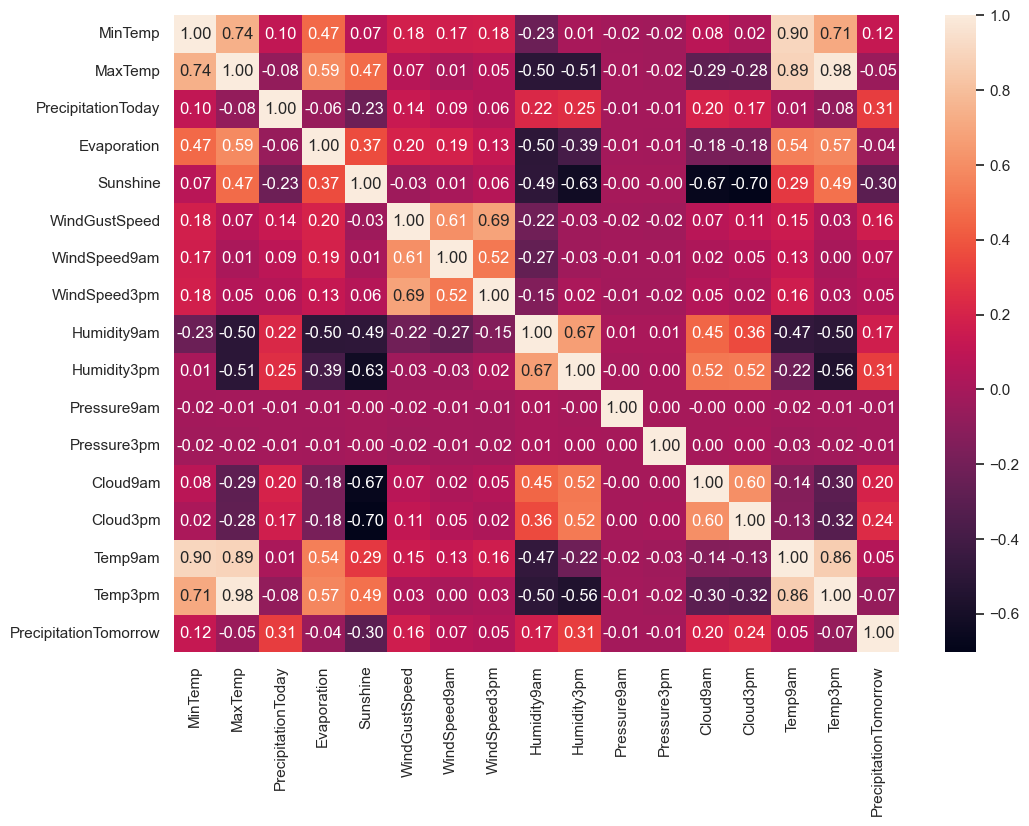

In [64]:
# Correlation matrix

sns.set(rc = {'figure.figsize':(11.7,8.27)})
sns.heatmap(train.corr(numeric_only=True), annot=True, fmt=".2f")
plt.show()

Observations:

- strong positive correlation between
    - `Temp9am` and `MinTemp` (0.9)
    - `Temp3pm` and `MaxTemp` (0.98)
    - `Temp3pm` and `Temp9am` (0.86)
- moderate negative correlation between
    - `Cloud3pm` and `Sunshine` (-0.7)
    - `Cloud9am` and `Sunshine` (-0.68)
- no correlation between
    - `Pressure9am` and `Pressure3pm` (should have strong positive correlation, probably caused by incorrect data)
    - `Humidity` and `Pressure*` (pressure should be inversely proportional to humidity, probably caused by incorrect data)

Strong correlations should be removed from the data.
Cloud cover is preferable over sunshine, because sunshine is missing more rows.

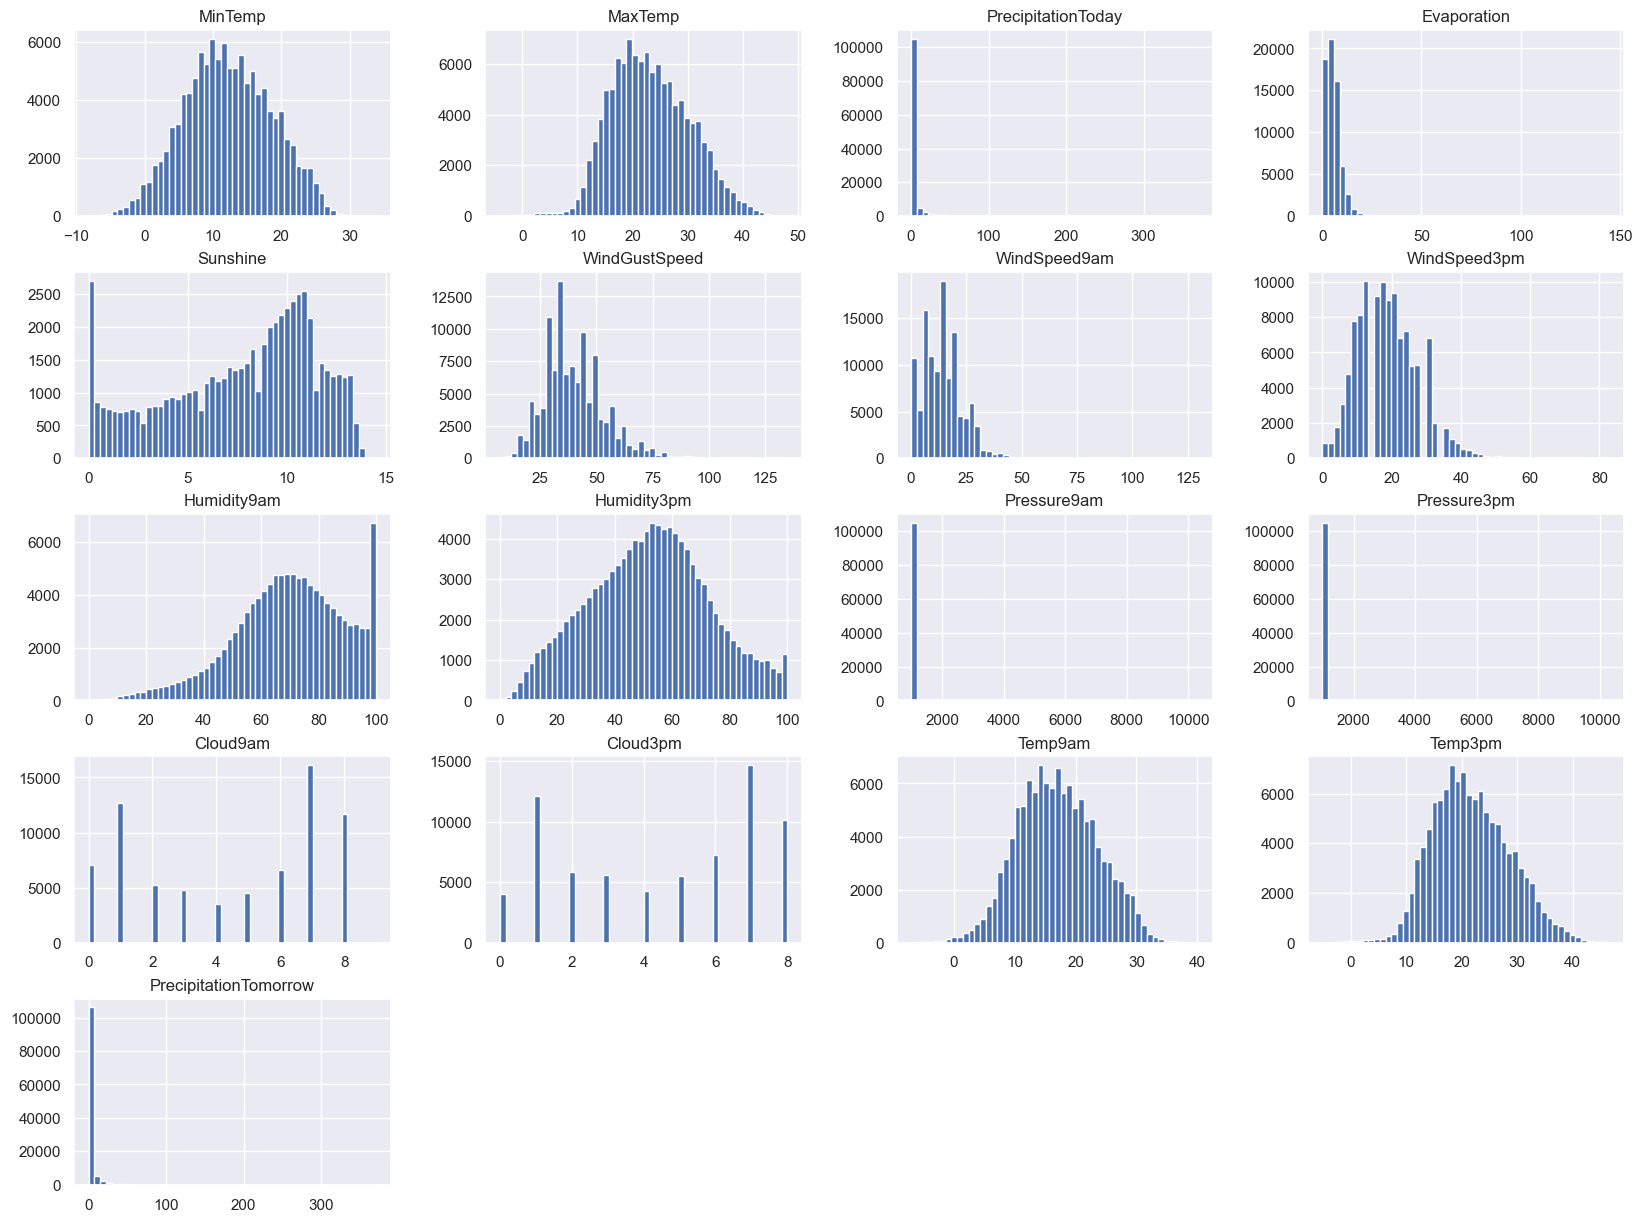

In [65]:
# Distributions of numeric columns
train[['MinTemp', 'MaxTemp', 'PrecipitationToday',
       'Evaporation', 'Sunshine', 'WindGustSpeed', 
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'PrecipitationTomorrow']].hist(figsize=(20, 15), bins=50)
plt.show()

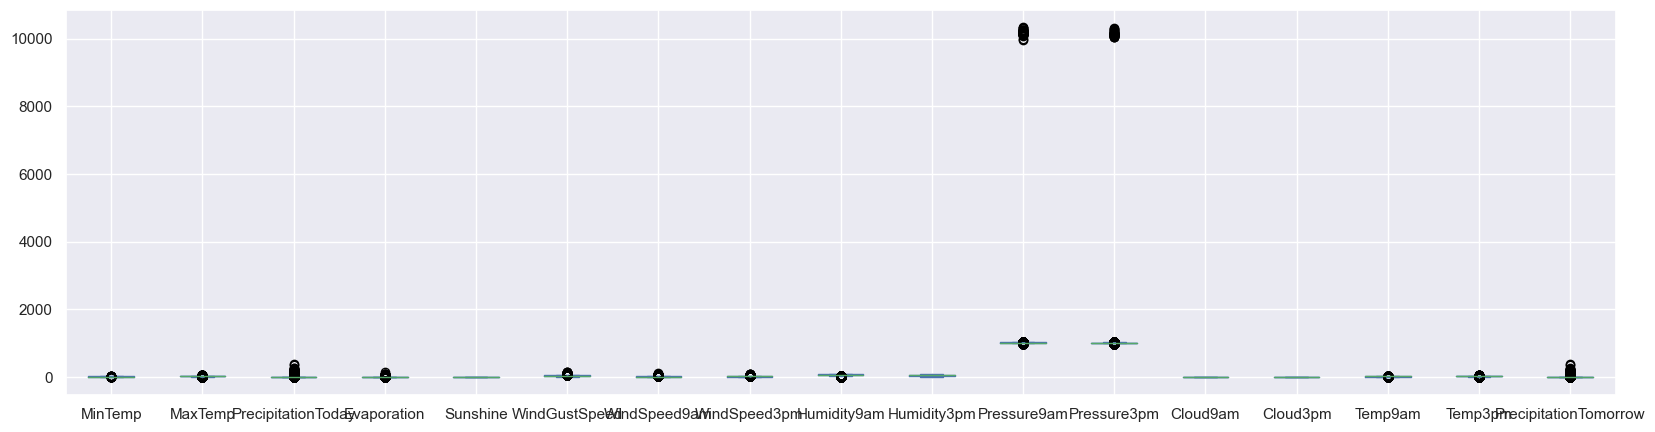

In [66]:
# Outliers
train[['MinTemp', 'MaxTemp', 'PrecipitationToday',
       'Evaporation', 'Sunshine', 'WindGustSpeed', 
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'PrecipitationTomorrow']].plot(figsize=(20, 5), kind="box")
plt.show()

### Observation:
- Pressure9am and Pressure3pm have extreme outliers.

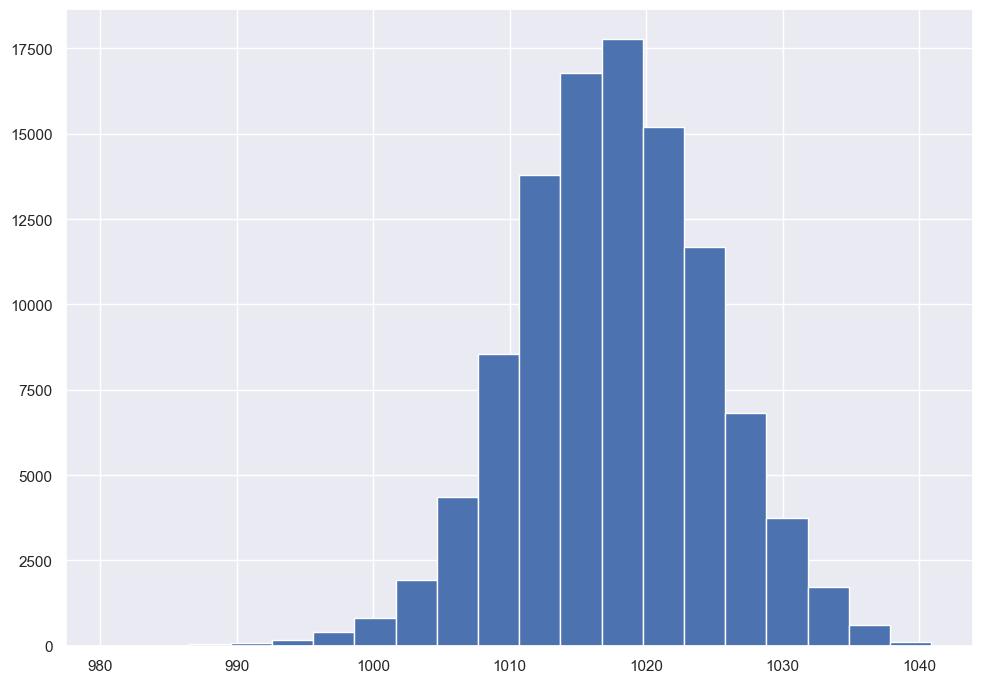

In [67]:
train.query("Pressure9am < 5000")["Pressure9am"].hist(bins=20)
plt.show()

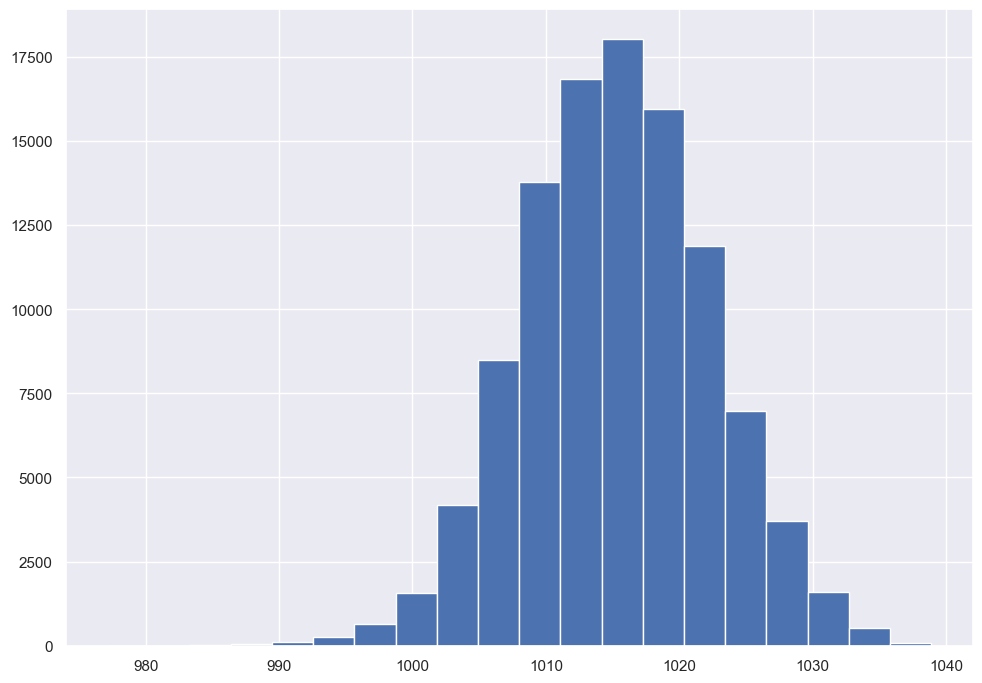

In [68]:
train.query("Pressure3pm < 5000")["Pressure3pm"].hist(bins=20)
plt.show()

### Observation:
- Pressure9am and Pressure3pm are normally distributed when plotted without outliers

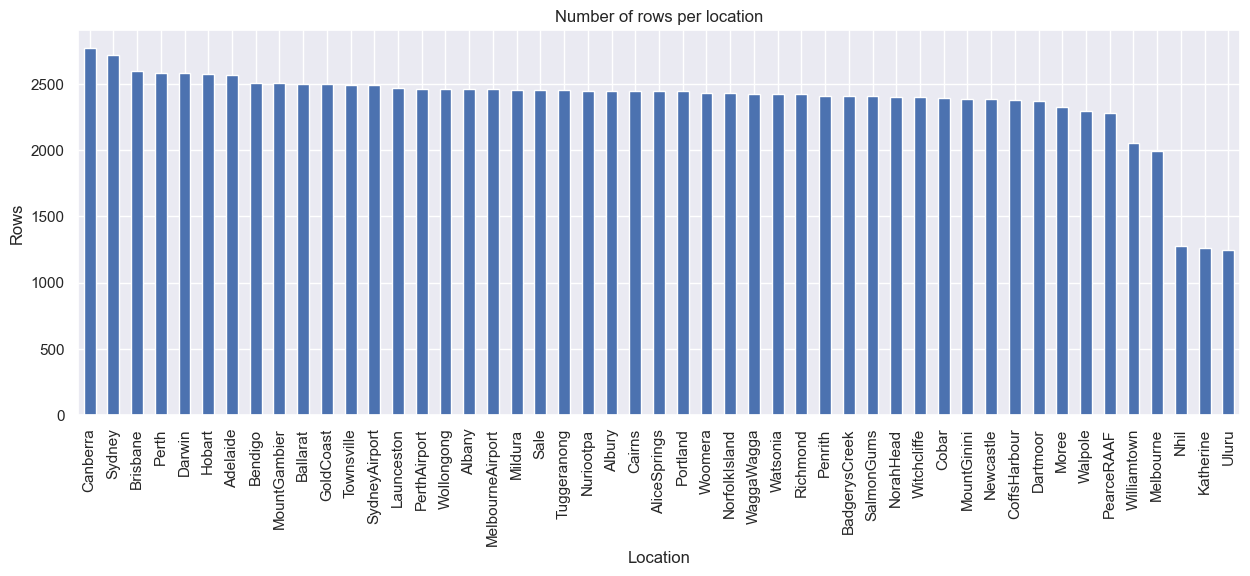

In [69]:
ax = train["Location"].value_counts().plot(kind="bar", figsize=(15, 5), title="Number of rows per location")
ax.set_xlabel("Location")
ax.set_ylabel("Rows")
plt.show()

In [70]:
train["RainTomorrowBool"] = train.RainTomorrow == "Yes"

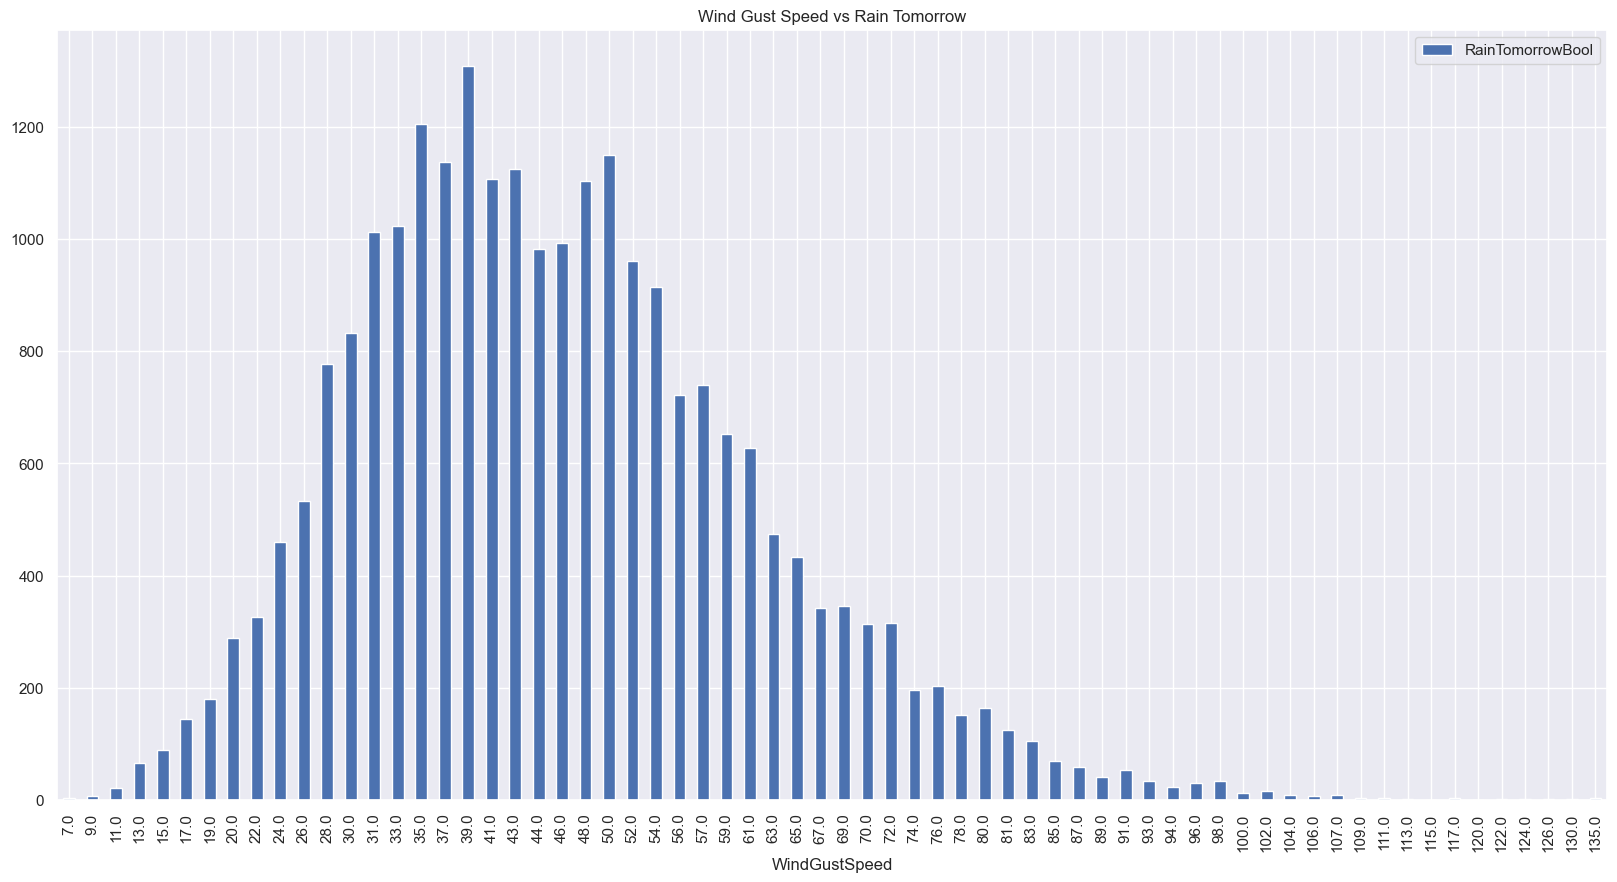

In [71]:
train[["WindGustSpeed", "RainTomorrowBool"]].groupby("WindGustSpeed").sum().plot(kind="bar", figsize=(20, 10), title="Wind Gust Speed vs Rain Tomorrow")
plt.show()

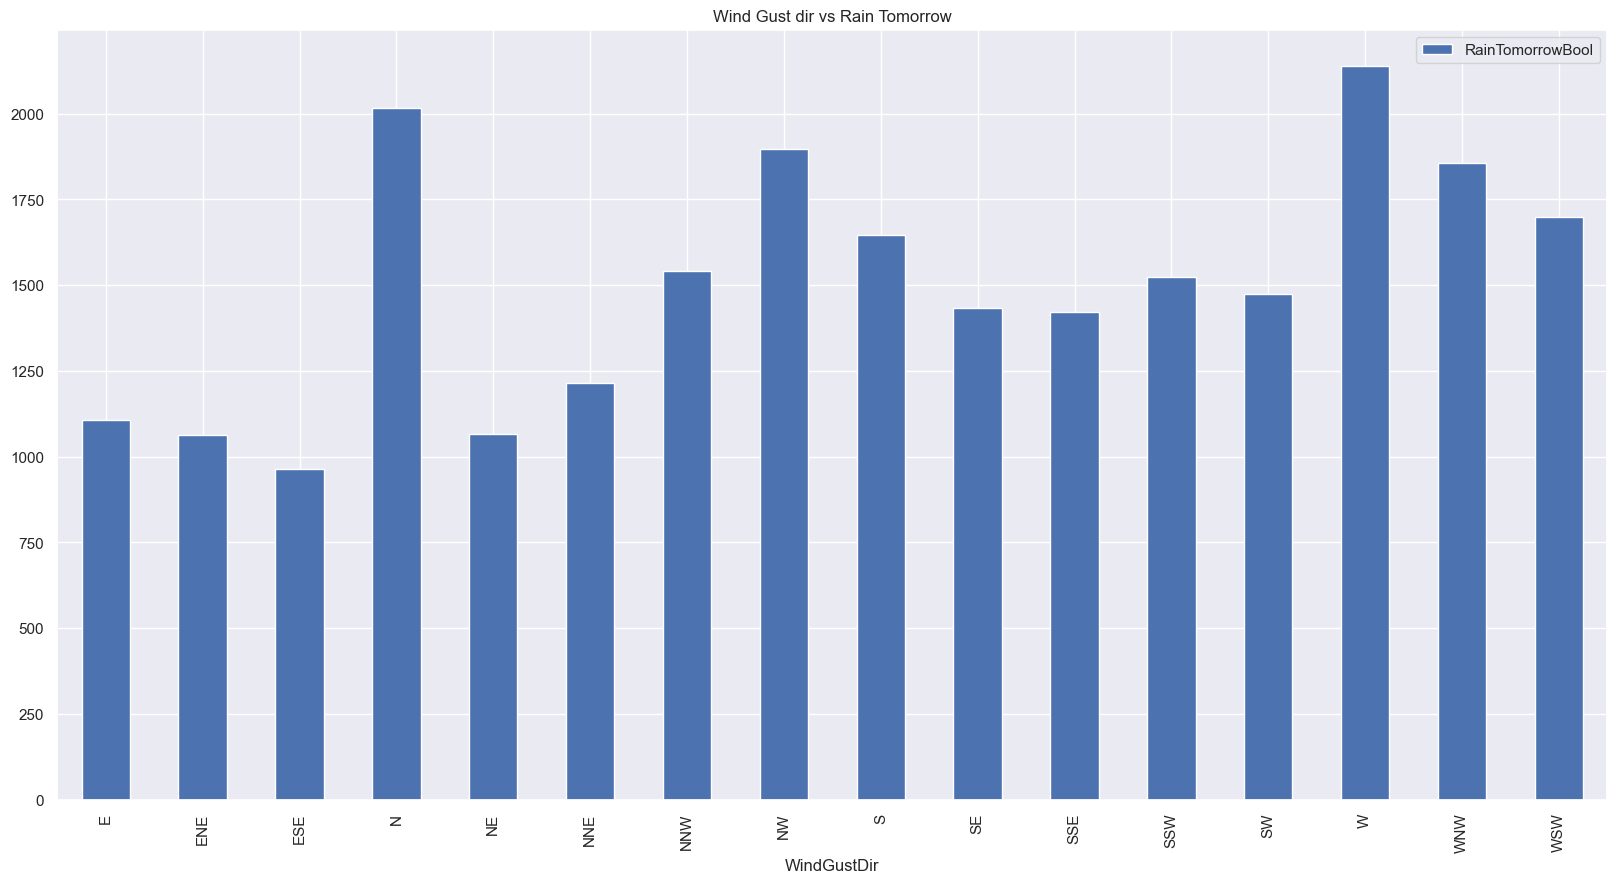

In [72]:
train[["WindGustDir", "RainTomorrowBool"]].groupby("WindGustDir").sum().plot(kind="bar", figsize=(20, 10), title="Wind Gust dir vs Rain Tomorrow")
plt.show()

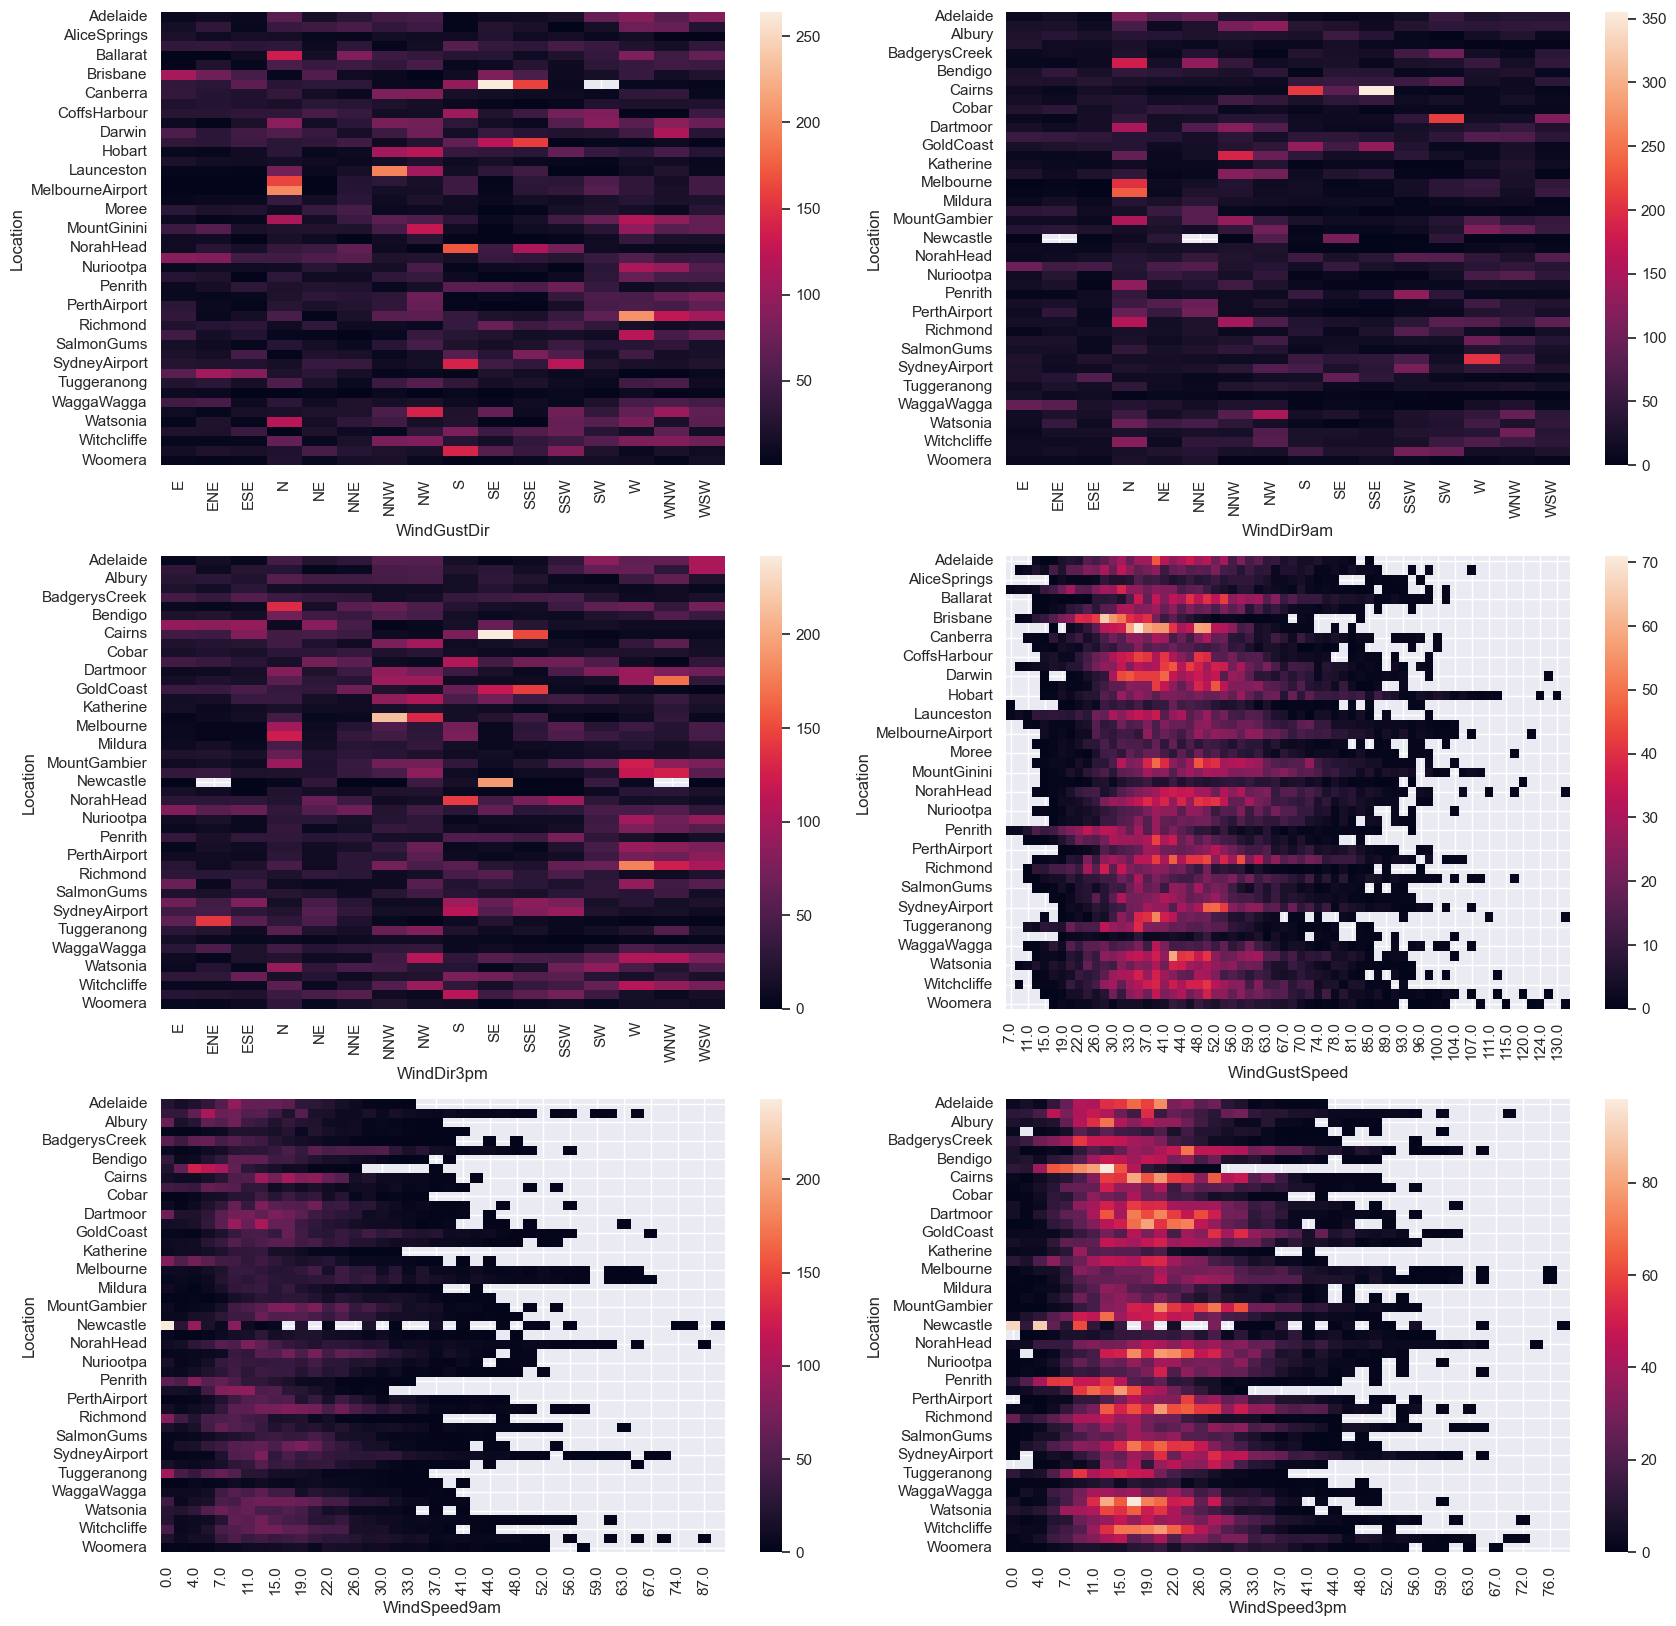

In [73]:
locWindDir = train[["Location", "WindGustDir", "RainTomorrowBool"]].pivot_table(index="Location", columns="WindGustDir", values='RainTomorrowBool', aggfunc='sum')
locWindDir9am = train[["Location", "WindDir9am", "RainTomorrowBool"]].pivot_table(index="Location", columns="WindDir9am", values='RainTomorrowBool', aggfunc='sum')
locWindDir3pm = train[["Location", "WindDir3pm", "RainTomorrowBool"]].pivot_table(index="Location", columns="WindDir3pm", values='RainTomorrowBool', aggfunc='sum')
locWindSpeed = train[["Location", "WindGustSpeed", "RainTomorrowBool"]].pivot_table(index="Location", columns="WindGustSpeed", values='RainTomorrowBool', aggfunc='sum')
locWindSpeed9am = train[["Location", "WindSpeed9am", "RainTomorrowBool"]].pivot_table(index="Location", columns="WindSpeed9am", values='RainTomorrowBool', aggfunc='sum')
locWindSpeed3pm = train[["Location", "WindSpeed3pm", "RainTomorrowBool"]].pivot_table(index="Location", columns="WindSpeed3pm", values='RainTomorrowBool', aggfunc='sum')
fig, axes = plt.subplots(3, 2, figsize=(20, 20))
sns.heatmap(locWindDir, ax=axes[0][0])
sns.heatmap(locWindDir9am, ax=axes[0][1])
sns.heatmap(locWindDir3pm, ax=axes[1][0])
sns.heatmap(locWindSpeed, ax=axes[1][1])
sns.heatmap(locWindSpeed9am, ax=axes[2][0])
sns.heatmap(locWindSpeed3pm, ax=axes[2][1])
plt.show()

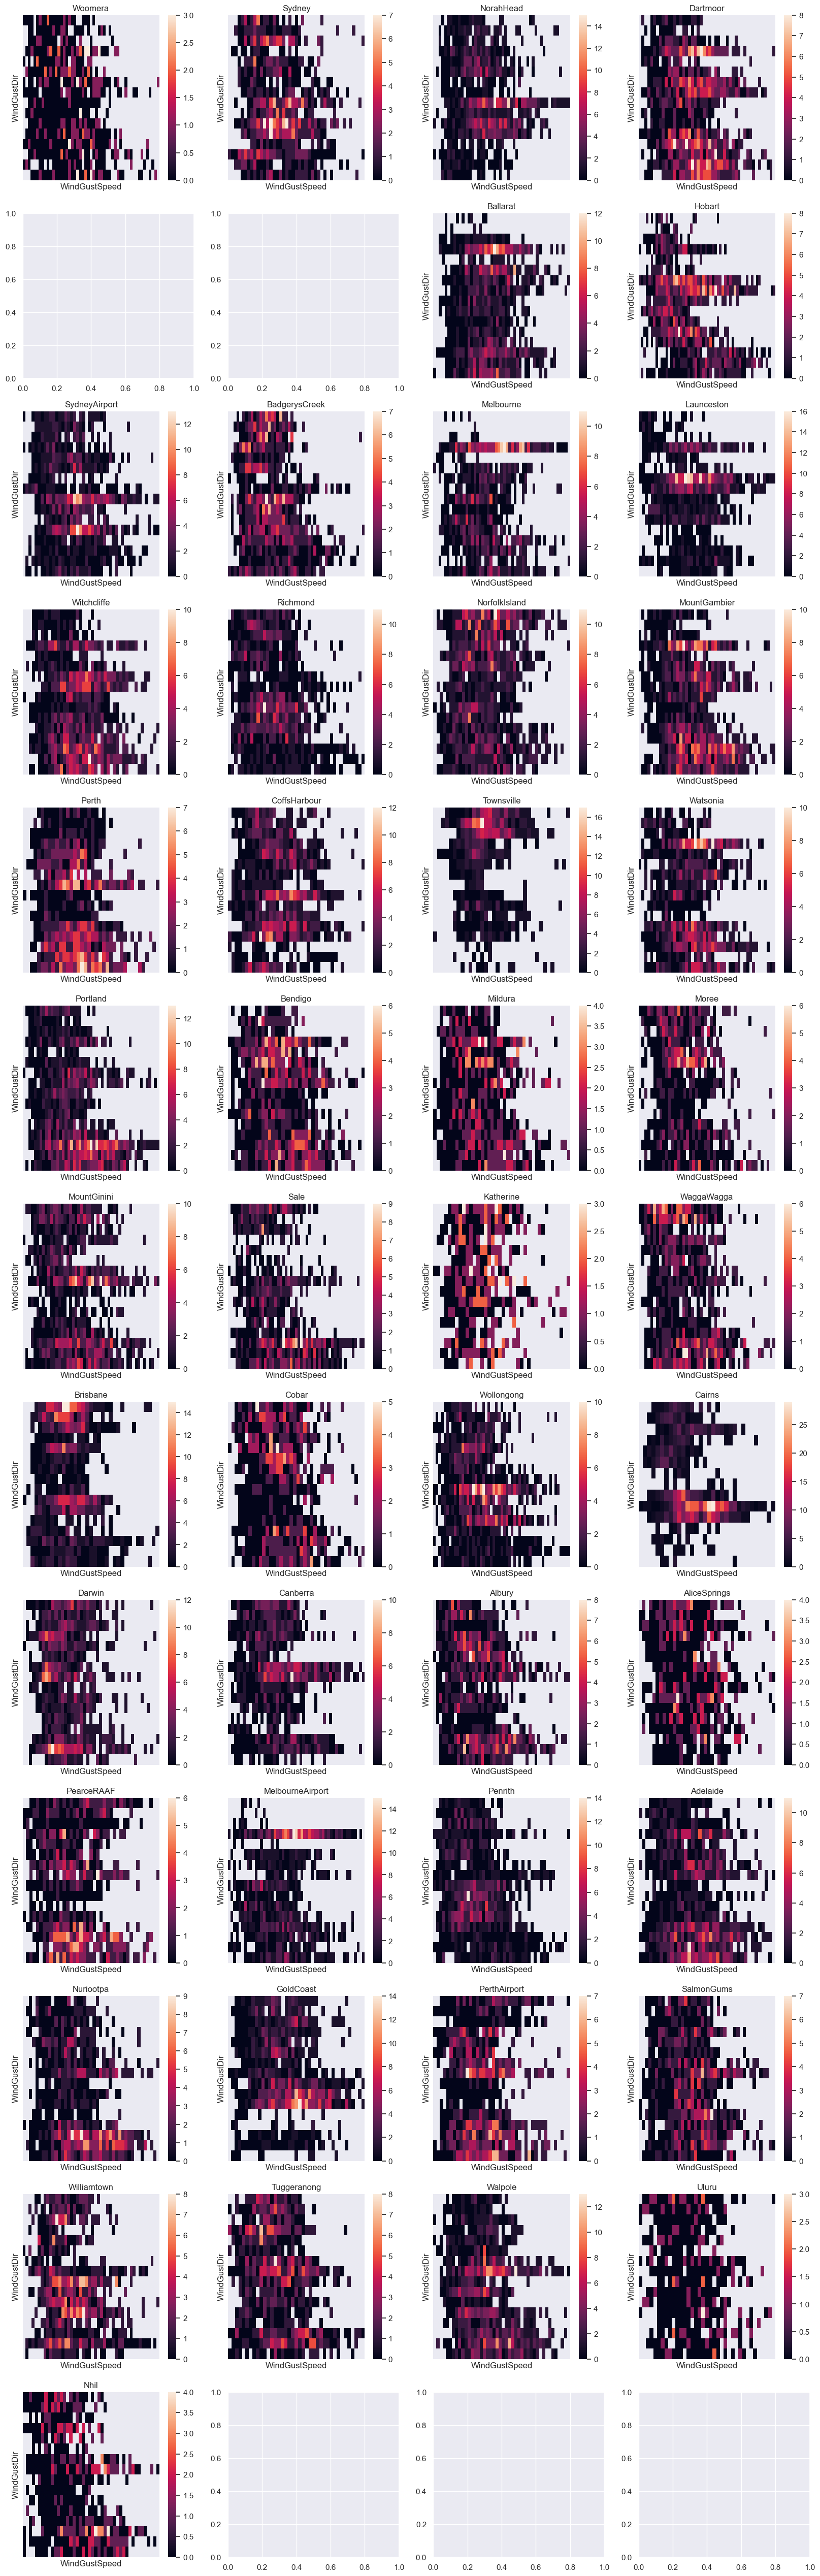

In [74]:
import math

locations = train.Location.unique()
loc_len = len(locations)
rows, cols = math.ceil(loc_len / 4), 4
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))

for idx, loc in enumerate(locations):
    data = train[train.Location == loc][["WindGustDir", "WindGustSpeed", "RainTomorrowBool"]]
    pt = data.pivot_table(index="WindGustDir", columns="WindGustSpeed", values='RainTomorrowBool', aggfunc='sum')
    try:
        ax = axes.flat[idx]
        sns.heatmap(pt, ax=ax, xticklabels=False, yticklabels=False)
        ax.set_title(loc)
    except ValueError:
        pass
plt.show()

### Observation
- each location have some combinations of wind direction and wind speed associated with higher amount of rainy days the next day.

In [75]:
train['Date'] = pd.to_datetime(train['Date'], format='%d/%m/%Y')
train["Month"] = train.Date.dt.month

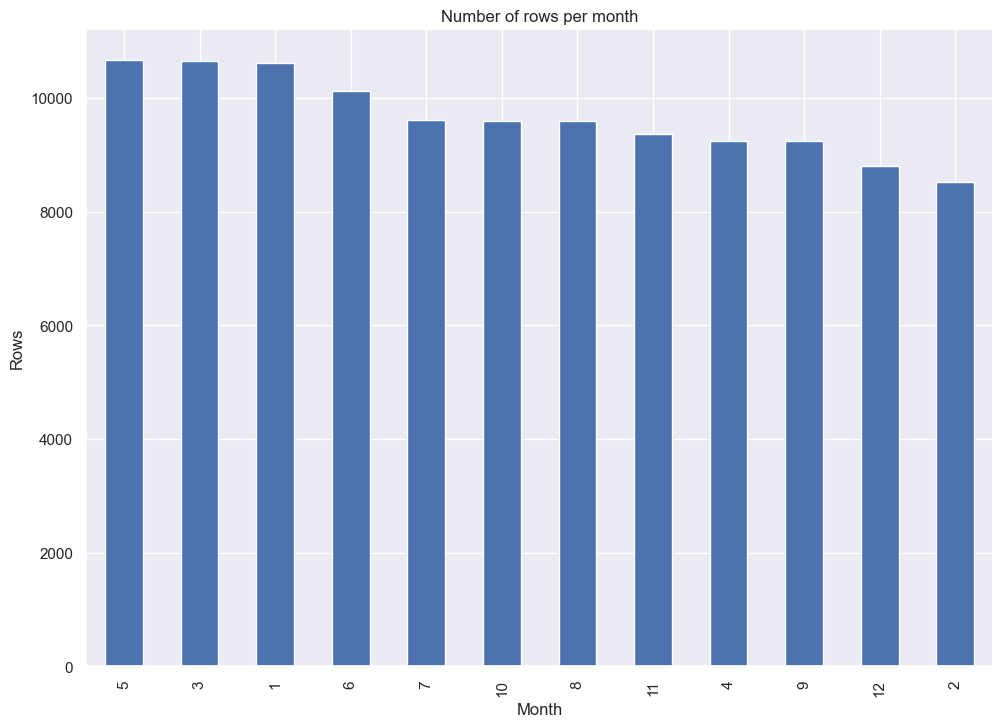

In [76]:
ax = train["Month"].value_counts().plot(kind="bar", title="Number of rows per month")
ax.set_xlabel("Month")
ax.set_ylabel("Rows")
plt.show()

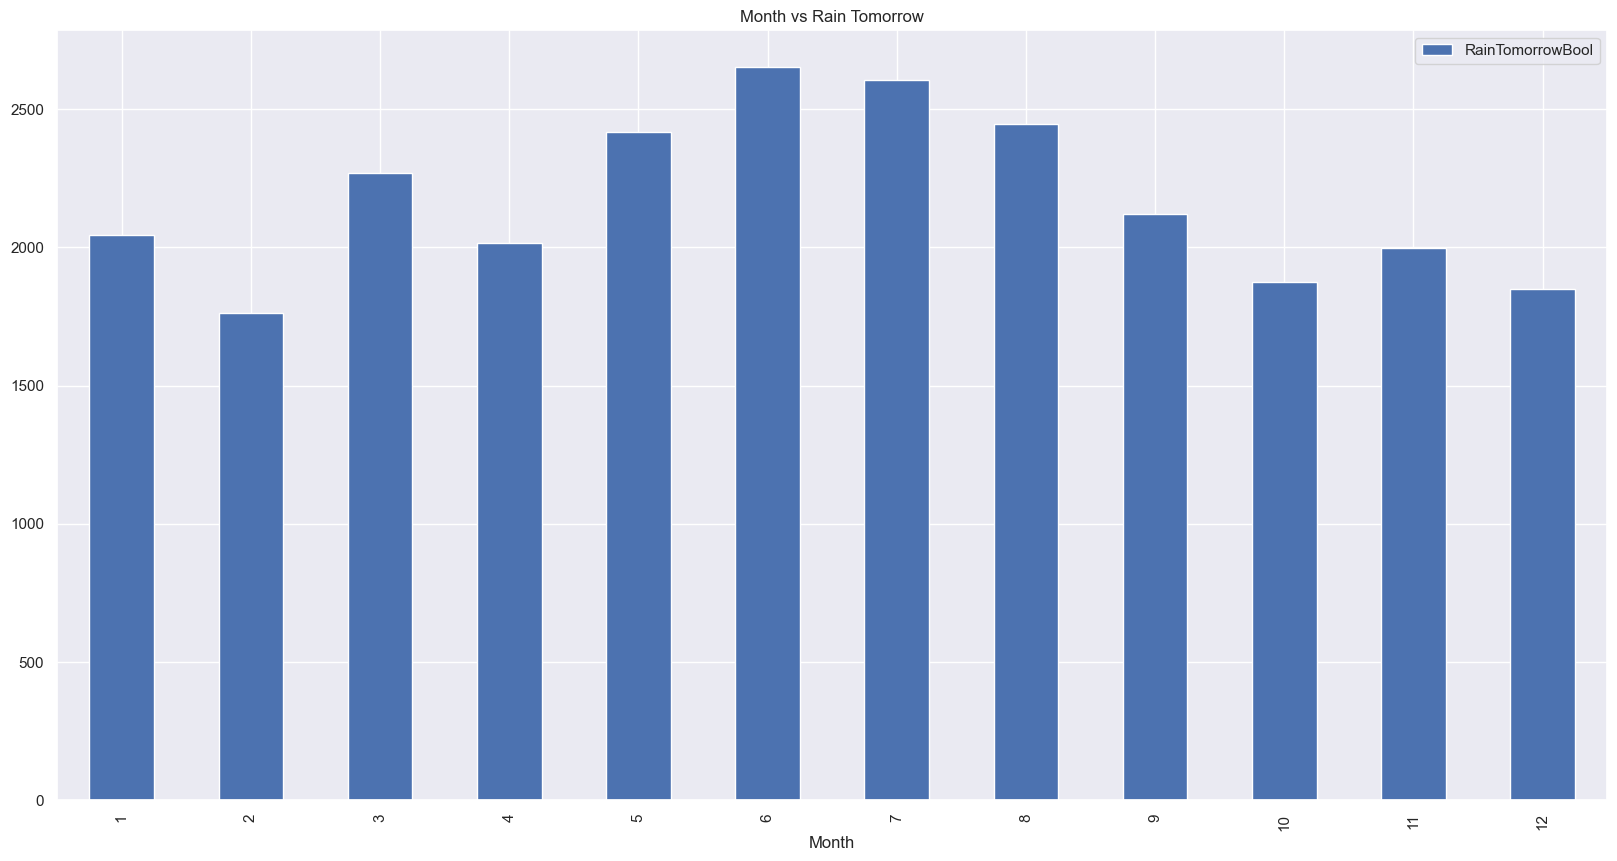

In [77]:
train[["Month", "RainTomorrowBool"]].groupby("Month").sum().plot(kind="bar", figsize=(20, 10), title="Month vs Rain Tomorrow")
plt.show()

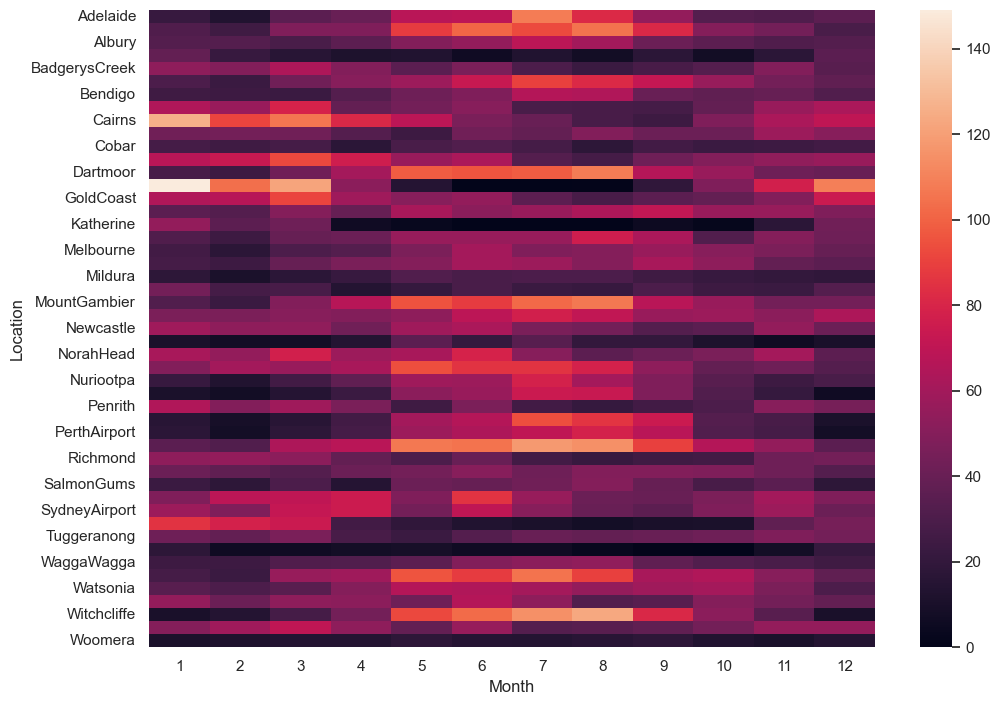

In [78]:
locMonth = train[["Location", "Month", "RainTomorrowBool"]].pivot_table(index="Location", columns="Month", values='RainTomorrowBool', aggfunc='sum')
sns.heatmap(locMonth)
plt.show()

### Observation
- each location have some months associated with higher amount of rainy days.

# Preprocessing

**TODO**:

- filter out columns that are not needed
- convert 3am 9am data to single column
- remove correlated variables
- subset dataset
- convert types
- remove incorrect data (pressure, cloud cover)
- imputation of missing values
- normalize data
- use one-hot encoding for categorical variables
- use label encoding for boolean variables

In [79]:
# type conversion

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

obj_cols = df.select_dtypes("object").columns
df[obj_cols] = df[obj_cols].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156412 entries, 0 to 156411
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Date                   156412 non-null  datetime64[ns]
 1   Location               156412 non-null  category      
 2   MinTemp                155712 non-null  float64       
 3   MaxTemp                156058 non-null  float64       
 4   PrecipitationToday     154883 non-null  float64       
 5   Evaporation            89520 non-null   float64       
 6   Sunshine               81873 non-null   float64       
 7   WindGustDir            146150 non-null  category      
 8   WindGustSpeed          146216 non-null  float64       
 9   WindDir9am             145404 non-null  category      
 10  WindDir3pm             152253 non-null  category      
 11  WindSpeed9am           154920 non-null  float64       
 12  WindSpeed3pm           153497 non-null  floa

# Model

## Model selection

## Model explanation

## Model training

## Model interpretation

## Model evaluation

# Results summary